<a href="https://colab.research.google.com/github/JoaoMunhoz01/La_Tribonera-To-Do/blob/main/Dados_do_Airbnb_de_Barcelona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Barcelona*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, analisarei os dados referentes à cidade Barcelona e ver quais insights podem ser extraídos à partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Barcelona (good for visualisations).*

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/spain/catalonia/barcelona/2021-10-10/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria o código.

Pensando nisso disponibilizo [aqui](https://drive.google.com/file/d/1qEpu3Bcgg4cwUG-1wKBhMwEMwjPbqBhf/view?usp=sharing) o conjunto utilizado para que você sempre consiga utilizar esse material.


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/spain/catalonia/barcelona/2021-10-10/visualisations/listings.csv')

## Análise dos Dados

Essa etapa objetiva criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* id - número único para identificação do imóvel
* name - nome do imóvel no Airbnb 
* host_id - número único para identificação do proprietário
* host_name - nome do proprietário
* neighbourhood_group - grupo de vizinhança geocodificado usando a latitude e longitude
* neighbourhood - bairro
* latitude - latitude do imóvel
* longitude - longitude do imóvel
* room_type - tipo do imóvel
* price - preço da diária
* minimum_nights - quantidade mínima de noites para aluguel
* number_of_reviews - número de avaliações
* last_review - data da avaliação mais recente
* reviews_per_month - número de avaliações no mês
* calculated_host_listings_count - número de imóveis do proprietário
* availability_365 - número de dias de disponibilidade dentro de 365 dias
* number_of_reviews_ltm - número de avaliações nos últimos 12 meses
* license - número da licença

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40420,2.17306,Entire home/apt,121,1,21,2019-10-11,0.23,19,47,0,HUTB-002062
1,23197,Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41291,2.22063,Entire home/apt,220,4,52,2019-12-15,0.74,2,86,0,HUTB-005057
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40566,2.17015,Entire home/apt,144,2,63,2019-09-06,0.60,3,85,0,HUTB-001722
3,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.37978,2.17623,Entire home/apt,181,4,156,2020-03-11,1.55,2,136,7,HUTB-001506
4,35379,Double 04 CasanovaRooms Barcelona,152232,Pablo,Eixample,l'Antiga Esquerra de l'Eixample,41.39036,2.15274,Private room,41,2,358,2021-07-21,4.01,4,193,41,Exempt


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Aqui se identifica a quantidade de entradas (linhas) e atributos (colunas) que o conjunto de dados possui e os tipos de cada coluna.

In [4]:
# identificar o volume de dados do DataFrame
print('Quantidade de entradas (linhas) do conjunto: {}'.format(df.shape[0]))
print('Quantidade de atributos (colunas) do conjunto: {}\n'.format(df.shape[1]))
# verificar os tipos de cada coluna
df.dtypes

Quantidade de entradas (linhas) do conjunto: 16055
Quantidade de atributos (colunas) do conjunto: 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

É importante entender logo no início se os valores nulos são significativos comparados ao total de entradas.

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
round(((df.isnull().sum() / df.shape[0]) * 100), 2).sort_values(ascending = False)

license                           35.99
reviews_per_month                 26.68
last_review                       26.68
host_name                          0.26
name                               0.06
longitude                          0.00
host_id                            0.00
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
room_type                          0.00
number_of_reviews_ltm              0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
calculated_host_listings_count     0.00
availability_365                   0.00
id                                 0.00
dtype: float64

É possível ver que a coluna license possui 35,99% dos seus valores faltantes.
As variáveis reviews_per_month e last_review possuem valores nulos em 26,68%.
As variáveis host_name e name têm 0,26% e 0,06% dos valores nulos, respectivamente.
O restante das variáveis não têm valores nulos.

Aqui se vê que a coluna license tem cerca de 36% dos seus valores nulos, isso talvez se deva ao fato de que a lei do turismo da Catalunha exige que as residências usadas para estadias turísticas de menos de 30 dias sejam registradas no Escritório de Turismo da Catalunha antes de iniciar a operação. O número de registro deve ser exibido ao anunciar a casa.

Uma análise do Inside Airbnb de "Casas / apartamentos inteiros" e "quartos privados" em Barcelona em 3 de janeiro de 2016 mostra que 78% (11.520 de 14.699 anúncios) não têm número de licença exibido e provavelmente não são licenciados e são ilegais.

### **Q3. Qual o tipo de distribuição das variáveis?** 

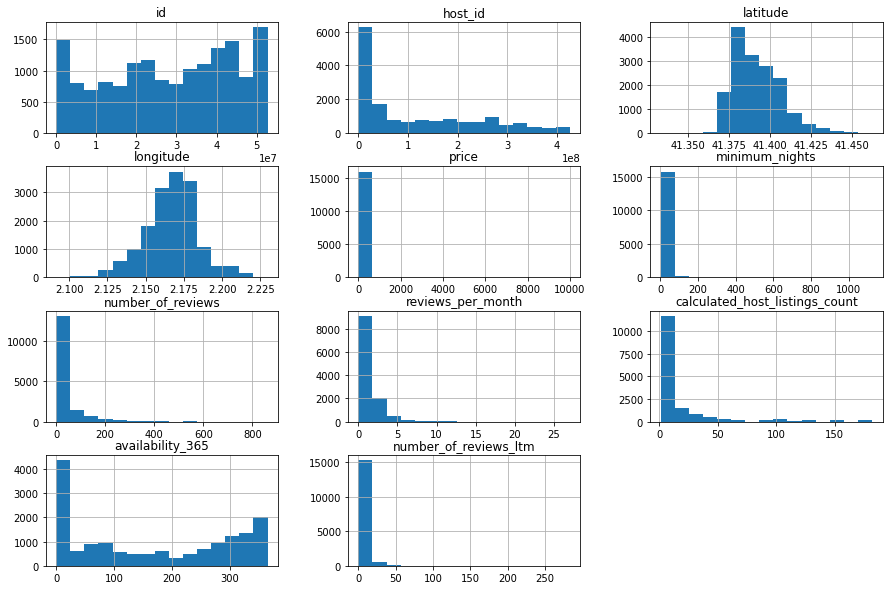

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers* (pontos fora da curva). Olhe por exemplo as variáveis price, minimum_nights e calculated_host_listings_count.

Os valores não seguem uma distruição e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* resumo estatístico usando o método describe();
* Plotar boxplots para a variável.

In [7]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,16055.000000,16055.000000,16055.000000,11772.000000,16055.000000,16055.000000
mean,112.467331,12.970103,34.153348,1.164569,17.319028,164.437745
std,325.455790,31.696885,67.383300,1.439324,33.352697,136.654295
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.000000,1.000000,0.000000,0.180000,1.000000,8.000000
50%,70.000000,3.000000,5.000000,0.700000,3.000000,153.000000
75%,125.000000,30.000000,35.000000,1.670000,16.000000,306.000000
max,9999.000000,1124.000000,862.000000,27.000000,182.000000,365.000000


Usando o método describe() já é possível notar que há *outliers* nas colunas price e minimum_nights. Para que a visualização fique mais clara, plotarei o gráfico boxplot para essas colunas.

## Boxplot para price

Preços acima de $1000 por noite:
55 valores
0.3426%


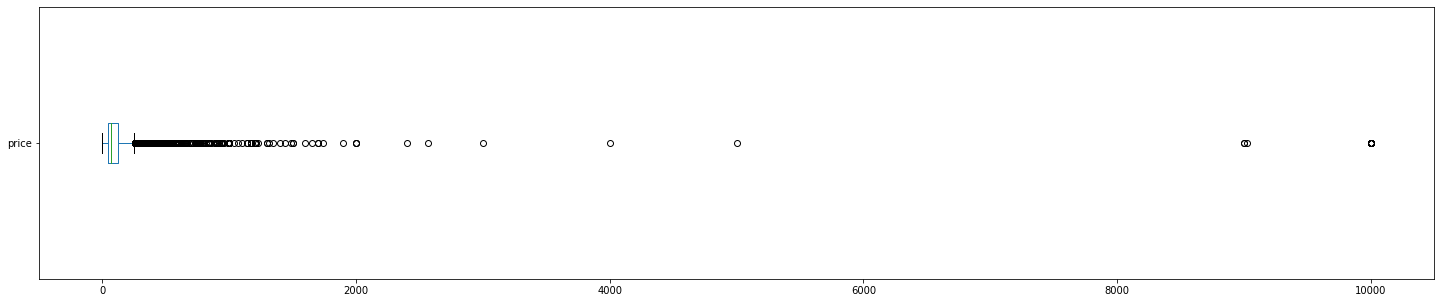

In [8]:
df.price.plot(kind = 'box', vert = False, figsize = (25, 5));

#ver a quantidade de valores acima de 1000 para price
print('Preços acima de $1000 por noite:')
print('{} valores'.format(len(df[df.price > 1000])))
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0]) * 100))

##Boxplot para minimum_nights

minimum_nights acima de 60:
305 valores
1.8997%


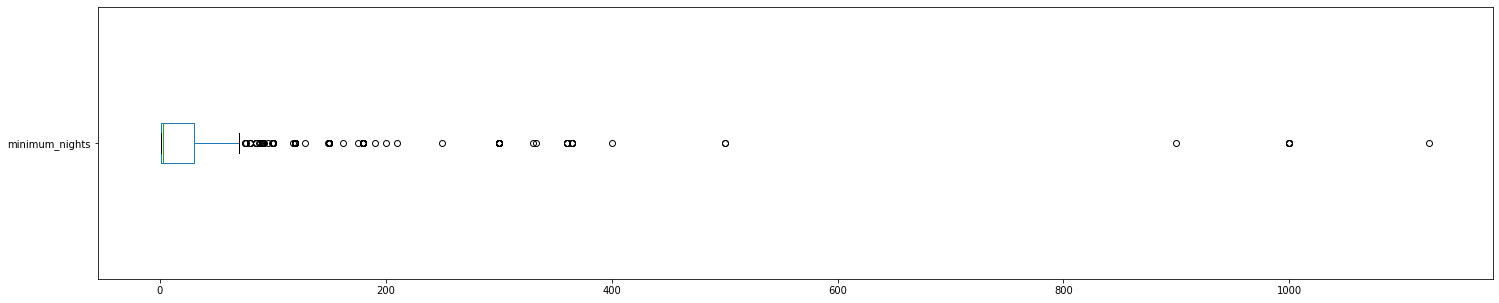

In [9]:
df.minimum_nights.plot(kind = 'box', vert = False, figsize = (25, 5));

# ver quantidade de valores acima de 60 dias para minimum_night
print('minimum_nights acima de 60:')
print('{} valores'.format(len(df[df.minimum_nights > 60])))
print("{:.4f}%".format((len(df[df.minimum_nights > 60]) / df.shape[0])*100))

## Boxplot para calculated_host_listings_count

calculated_host_listings acima de 90:
983 valores
1.0090%


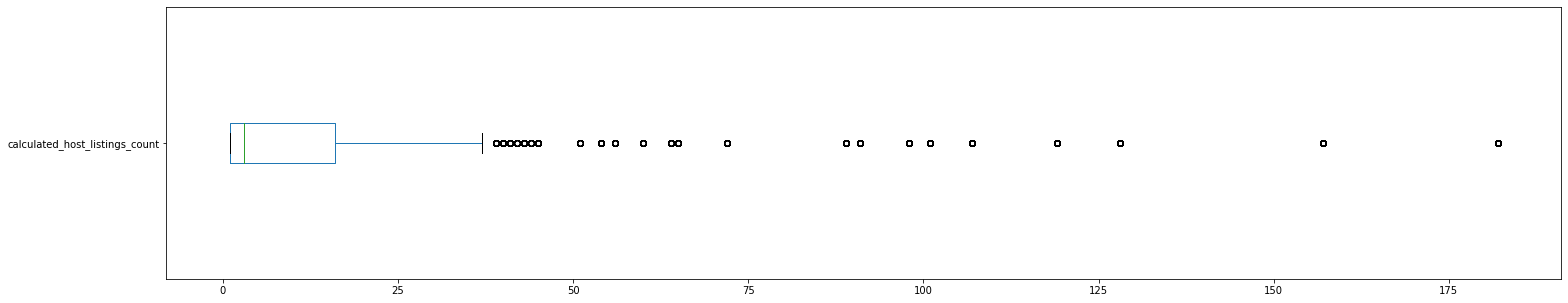

In [10]:
df.calculated_host_listings_count.plot(kind = 'box', vert = False, figsize = (25, 5));

# ver quantidade de valores acima de 30 dias para minimum_night
print('calculated_host_listings acima de 90:')
print('{} valores'.format(len(df[df.calculated_host_listings_count > 90])))
print("{:.4f}%".format((len(df[df.minimum_nights > 90]) / df.shape[0])*100))

Agora que os *outliers* foram identificados é necessário rever a distribuição das variáveis sem eles para que se veja um resultado mais fidedigno.

## Histograma sem os *outliers*

In [28]:
# novo dataframe, sem os outliers
df_limpo = df.copy()

In [39]:
# remoção dos imóveis sem nome/descrição
df_limpo.drop(df_limpo[df_limpo.name.isnull()].index, axis = 0, inplace = True)

# remoção dos imóveis com aluguel acima de $1000
df_limpo.drop(df_limpo[df_limpo.price > 1000].index, axis = 0, inplace = True)

# remoção dos imóveis com aluguel por mais de 60 noites
df_limpo.drop(df_limpo[df_limpo.minimum_nights > 60].index, axis = 0, inplace = True)

# remoção dos imóveis em que seus donos possuam mais de 90 imóveis em Barcelona
df_limpo.drop(df_limpo[df_limpo.calculated_host_listings_count > 90].index, axis = 0, inplace = True)

Aqui foram removidos os *outliers* para que a interpretação dos dados não seja distorcida. Optei por remover os nomes porque essa remoção não alterará a interpretação, já que as linhas com imóveis sem nome/descrição representam apenas 0,0006% dos dados.

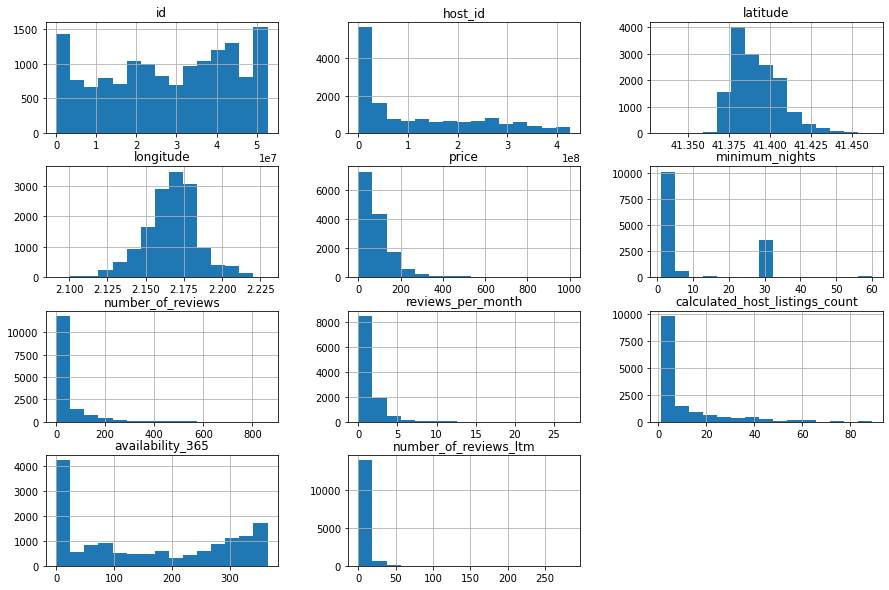

In [40]:
df_limpo.hist(bins = 15, figsize = (15, 10));

### **Q4. Qual a média dos preços de aluguel?**

In [41]:
# ver a média da coluna price
media_alugueis = round(df_limpo.price.mean(), 2)
print('O preço médio dos aluguéis é ${}'.format(media_alugueis))

O preço médio dos aluguéis é $97.79


### **Q4. Qual a correlação existente entre as variáveis**

In [42]:
# criar uma matriz de correlação
corr = df_limpo[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.152999,0.024891,0.021792,0.128223,0.152800
minimum_nights,-0.152999,1.000000,-0.216094,-0.238155,0.154085,0.107715
number_of_reviews,0.024891,-0.216094,1.000000,0.556410,-0.105698,0.064200
reviews_per_month,0.021792,-0.238155,0.556410,1.000000,-0.058076,0.112276
calculated_host_listings_count,0.128223,0.154085,-0.105698,-0.058076,1.000000,0.141257
availability_365,0.152800,0.107715,0.064200,0.112276,0.141257,1.000000


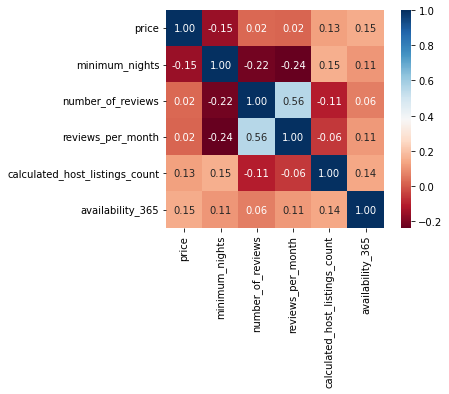

In [43]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [35]:
# mostrar a quantidade de cada tipo de imóvel disponível
print(df_limpo.room_type.value_counts())
print('\nO tipo de imóvel mais alugado é Entire home/apt com {} aluguéis.'.format(df_limpo.room_type.value_counts().max()))

Entire home/apt    7621
Private room       6682
Hotel room          229
Shared room         190
Name: room_type, dtype: int64

O tipo de imóvel mais alugado é Entire home/apt com 7621 aluguéis.


In [44]:
# mostrar a porcentagem de cada tipo de imóvel disponível
tipo_imovel = round((df_limpo.room_type.value_counts() / df_limpo.shape[0]) * 100, 2)
print('Porcentagem de tipos de imóveis disponíveis: \n')
print(tipo_imovel)

Porcentagem de tipos de imóveis disponíveis: 

Entire home/apt    51.80
Private room       45.35
Hotel room          1.56
Shared room         1.29
Name: room_type, dtype: float64


### **Q6. Qual a localidade mais cara do dataset?**



In [51]:
# ver preços por bairros, na média
print('Os preços (em média) dos aluguéis em Barcelona, por bairro: \n')
round(df_limpo.groupby(['neighbourhood_group']).price.mean(), 2).sort_values(ascending = False)

Os preços (em média) dos aluguéis em Barcelona, por bairro: 



neighbourhood_group
Eixample               117.57
Sarrià-Sant Gervasi    108.16
Les Corts               98.60
Gràcia                  98.08
Sant Martí              97.59
Ciutat Vella            85.44
Sants-Montjuïc          76.49
Sant Andreu             63.24
Horta-Guinardó          63.00
Nou Barris              40.91
Name: price, dtype: float64

A localidade mais cara é no bairro Eixample.

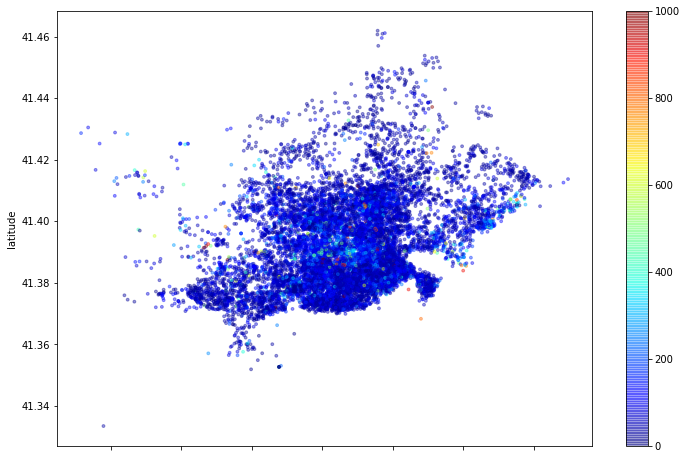

In [38]:
# plotar os imóveis pela latitude-longitude
df_limpo.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_limpo['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [52]:
# ver a média da coluna minimum_nights
media_noites = round(df_limpo.minimum_nights.mean(), 2)
print('A média de noites disponíveis para aluguel é de {} dias'.format(media_noites))

A média de noites disponíveis para aluguel é de 10.12 dias


## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem outliers em algumas das variáveis.

Em Barcelona há muitos imóveis em que o mínimo de noites para aluguel é acima de 30 dias.

Há muitos proprietários com muitos imóveis na cidade.